**Proyek Mandiri LSTM**

Import library

In [28]:
import numpy as np
import pandas as pd 
from google.colab import drive

from matplotlib import pyplot as plt
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.preprocessing.sequence import TimeseriesGenerator

from sklearn.metrics import mean_squared_error
from math import sqrt



In [29]:
# pip install EMD-signal

Load Dataset

In [30]:
drive.mount("/content/gdrive")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [31]:
path_train_dataset = 'gdrive/My Drive/S2/PML/proyek_mandiri/DOV_train.csv'
df_train = pd.read_csv(path_train_dataset)
df = pd.read_csv(path_train_dataset)
# df_train = df_train[['open','high','low']]
df_train = df_train[['close']]



In [32]:
# df_train.tail()
df_train_target = df[['close']]

In [33]:
#load test set
path_test_dataset = 'gdrive/My Drive/S2/PML/proyek_mandiri/DOV_test.csv'
df_test = pd.read_csv(path_test_dataset)
test_valid = df_test[['close']]
df_test_save = df_test
# df_test.head()
df_test = df_test[['close']]

In [34]:
df

,date,open,high,low,close,volume,Name
0,2013-02-08,70.90,71.35,70.77,71.13,921228,DOV
1,2013-02-11,71.10,71.56,71.01,71.06,1079451,DOV
2,2013-02-12,71.16,71.70,71.04,71.46,1121815,DOV
3,2013-02-13,71.46,71.83,71.23,71.61,948596,DOV
4,2013-02-14,71.48,71.89,71.29,71.86,1049107,DOV
...,...,...,...,...,...,...,...
977,2016-12-23,75.72,75.81,75.34,75.60,391318,DOV
978,2016-12-27,75.72,76.56,75.72,76.32,544176,DOV
979,2016-12-28,76.30,76.74,75.18,75.31,1124410,DOV
980,2016-12-29,75.53,75.94,74.91,75.19,426344,DOV


In [35]:
df_test_save 

,date,open,high,low,close,volume,Name
0,2017-01-03,76.31,77.5300,75.4200,76.42,1323108,DOV
1,2017-01-04,76.61,76.8500,76.0700,76.78,941779,DOV
2,2017-01-05,76.50,77.2900,75.6101,76.53,933060,DOV
3,2017-01-06,77.33,78.9600,77.2400,77.72,2522910,DOV
4,2017-01-09,77.63,77.9000,76.4400,76.72,1026894,DOV
...,...,...,...,...,...,...,...
497,2017-12-22,100.50,101.0500,100.0700,100.46,605094,DOV
498,2017-12-26,100.65,101.6299,100.3600,101.12,546257,DOV
499,2017-12-27,100.97,101.6000,100.6600,101.14,557815,DOV
500,2017-12-28,101.52,101.8500,100.7700,101.44,501641,DOV


In [36]:
df_train

,close
0,71.13
1,71.06
2,71.46
3,71.61
4,71.86
...,...
977,75.60
978,76.32
979,75.31
980,75.19


Preprocessing

In [37]:
#preproceesing training data
add = df_train[-7:]
test_data = add
test_data.reset_index()

test_data = test_data.append(df_test)
test_data

,close
975,75.89
976,75.60
977,75.60
978,76.32
979,75.31
...,...
497,100.46
498,101.12
499,101.14
500,101.44


In [38]:
Xscaler = MinMaxScaler(feature_range=(0, 1)) # scale so that all the X data will range from 0 to 1
Xscaler.fit(df_train)
scaled_X_train = Xscaler.transform(df_train)


In [39]:
scaled_X_train

array([[0.42105263],
       [0.41945774],
       [0.42857143],
       [0.43198906],
       [0.43768512],
       [0.45363409],
       [0.46046936],
       [0.44588745],
       [0.43221691],
       [0.46639326],
       [0.42720437],
       [0.44657097],
       [0.47778537],
       [0.47163363],
       [0.46274778],
       [0.44930508],
       [0.47436774],
       [0.47003873],
       [0.46593757],
       [0.48074732],
       [0.48393712],
       [0.46844384],
       [0.47960811],
       [0.49829118],
       [0.48826612],
       [0.48393712],
       [0.476874  ],
       [0.47231716],
       [0.4488494 ],
       [0.45887446],
       [0.44588745],
       [0.45819093],
       [0.44862155],
       [0.46092504],
       [0.43563454],
       [0.421964  ],
       [0.41626794],
       [0.43905218],
       [0.43517886],
       [0.46229209],
       [0.46434267],
       [0.49578492],
       [0.50239234],
       [0.47300068],
       [0.40601504],
       [0.44588745],
       [0.39325587],
       [0.363

In [40]:
Yscaler = MinMaxScaler(feature_range=(0, 1))
Yscaler.fit(df_train_target)
scaled_y_train = Yscaler.transform(df_train_target)
print(scaled_y_train.shape)
scaled_y_train = scaled_y_train.reshape(-1) # remove the second dimention from y so the shape changes from (n,1) to (n,)
print(scaled_y_train.shape)
 
scaled_y_train = np.insert(scaled_y_train, 0, 0)
scaled_y_train = np.delete(scaled_y_train, -1)

(982, 1)
(982,)


In [41]:
scaled_y_train

array([0.        , 0.42105263, 0.41945774, 0.42857143, 0.43198906,
       0.43768512, 0.45363409, 0.46046936, 0.44588745, 0.43221691,
       0.46639326, 0.42720437, 0.44657097, 0.47778537, 0.47163363,
       0.46274778, 0.44930508, 0.47436774, 0.47003873, 0.46593757,
       0.48074732, 0.48393712, 0.46844384, 0.47960811, 0.49829118,
       0.48826612, 0.48393712, 0.476874  , 0.47231716, 0.4488494 ,
       0.45887446, 0.44588745, 0.45819093, 0.44862155, 0.46092504,
       0.43563454, 0.421964  , 0.41626794, 0.43905218, 0.43517886,
       0.46229209, 0.46434267, 0.49578492, 0.50239234, 0.47300068,
       0.40601504, 0.44588745, 0.39325587, 0.36318068, 0.35315562,
       0.34973798, 0.37480064, 0.39690134, 0.39393939, 0.37480064,
       0.38847118, 0.37206653, 0.35042151, 0.38004101, 0.42173616,
       0.44041923, 0.44543176, 0.46388699, 0.46912736, 0.48644338,
       0.48621554, 0.51902483, 0.53201185, 0.52677147, 0.55958077,
       0.57347915, 0.57461836, 0.54135338, 0.61266803, 0.60469

In [42]:
n_input = 7 #how many samples/rows/timesteps to look in the past in order to forecast the next sample
n_features= df_train.shape[1] # how many predictors/Xs/features we have to predict y
b_size = 32 # Number of timeseries samples in each batch
#b_size = 64
generator = TimeseriesGenerator(scaled_X_train, scaled_y_train, length=n_input, batch_size=b_size)
 
print(generator[0][0].shape)

(32, 7, 1)


In [43]:
print(df_train.shape)

(982, 1)


Arsitektur LSTM

In [44]:
regressor = Sequential()
regressor.add(LSTM(units = 100, activation='relu',return_sequences = True, input_shape = (n_input, n_features)))
regressor.add(LSTM(units = 50,activation='relu'))
regressor.add(Dense(units = 1))
opt = keras.optimizers.Adam(learning_rate=0.001)
regressor.compile(optimizer=opt, loss='mse')
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 7, 100)            40800     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [45]:
#  regressor.fit_generator(generator,epochs=40)
regressor.fit_generator(generator,epochs=40)
 # test 1 epoch 40
 # test 2 epoch 60

Epoch 1/40


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


31/31 [==============================] - 3s 10ms/step - loss: 0.2497
Epoch 2/40
31/31 [==============================] - 0s 10ms/step - loss: 0.0142
Epoch 3/40
31/31 [==============================] - 0s 9ms/step - loss: 0.0028
Epoch 4/40
31/31 [==============================] - 0s 10ms/step - loss: 0.0030
Epoch 5/40
31/31 [==============================] - 0s 10ms/step - loss: 0.0019
Epoch 6/40
31/31 [==============================] - 0s 10ms/step - loss: 0.0020
Epoch 7/40
31/31 [==============================] - 0s 10ms/step - loss: 0.0028
Epoch 8/40
31/31 [==============================] - 0s 10ms/step - loss: 0.0022
Epoch 9/40
31/31 [==============================] - 0s 10ms/step - loss: 0.0033
Epoch 10/40
31/31 [==============================] - 0s 10ms/step - loss: 0.0026
Epoch 11/40
31/31 [==============================] - 0s 10ms/step - loss: 0.0019
Epoch 12/40
31/31 [==============================] - 0s 10ms/step - loss: 0.0020
Epoch 13/40
31/31 [==============================

In [46]:
scaled_X_test = Xscaler.transform(test_data)
test_generator = TimeseriesGenerator(scaled_X_test, np.zeros(len(test_data)), length=n_input, batch_size=b_size)
# print(test_generator[0][0].shape)

In [47]:
y_pred_scaled = regressor.predict(test_generator)
y_pred = Yscaler.inverse_transform(y_pred_scaled)

In [48]:
y_pred

array([[73.40513 ],
       [73.56878 ],
       [74.04225 ],
       [74.49323 ],
       [74.81513 ],
       [74.95457 ],
       [74.96261 ],
       [75.44374 ],
       [76.04711 ],
       [76.491776],
       [76.52262 ],
       [76.30564 ],
       [76.18059 ],
       [76.45109 ],
       [76.519035],
       [76.99493 ],
       [77.76311 ],
       [78.13459 ],
       [77.8128  ],
       [77.251305],
       [76.59442 ],
       [76.14905 ],
       [76.0031  ],
       [76.23107 ],
       [76.22143 ],
       [76.02278 ],
       [75.765465],
       [75.981606],
       [76.4837  ],
       [76.931435],
       [77.11232 ],
       [77.34868 ],
       [77.54472 ],
       [77.62735 ],
       [77.86988 ],
       [78.22759 ],
       [78.247055],
       [78.00946 ],
       [77.90358 ],
       [77.9221  ],
       [78.357376],
       [78.56077 ],
       [78.3007  ],
       [78.10859 ],
       [77.87109 ],
       [76.99958 ],
       [75.81714 ],
       [74.95083 ],
       [74.97529 ],
       [75.21509 ],


In [49]:
print(type(y_pred))

<class 'numpy.ndarray'>


In [50]:
print(test_valid)

      close
0     76.42
1     76.78
2     76.53
3     77.72
4     76.72
..      ...
497  100.46
498  101.12
499  101.14
500  101.44
501  100.99

[502 rows x 1 columns]


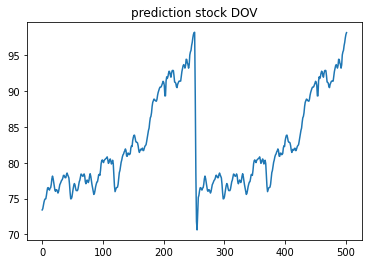

In [51]:
import matplotlib.pyplot as plt
plt.plot(y_pred)
plt.title('prediction stock DOV')
plt.show()

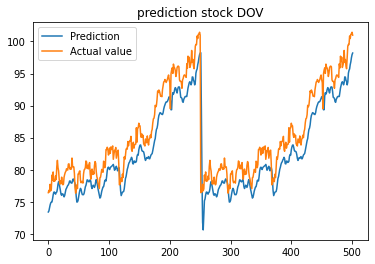

In [52]:
import matplotlib.pyplot as plt

plt.plot(y_pred, label = "Prediction")

# plotting the line 2 points 
plt.plot(test_valid, label = "Actual value")
# plt.xlabel('x - axis')
# Set the y axis label of the current axis.
# plt.ylabel('y - axis')
# Set a title of the current axes.
plt.title('prediction stock DOV')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [53]:
# loss = keras.losses.mean_squared_error(test_valid, y_pred)
mse = mean_squared_error(test_valid, y_pred)
rmse = sqrt(mse)

In [54]:
print("mse = ",mse)
print("rmse = ",rmse)

mse =  10.895722676176721
rmse =  3.3008669582666794
